# ERT and MALM Data processing

In [1]:
from pyPRD import processing as proc
import numpy as np
import pyvista as pv

imaging_path = '../imaging_ERT_MALM/'

filenames_ERT = ['PRD_ERT_1_130522',
                 'PRD_ERT_1_170522', 'PRD_ERT_2_170522',
                 'PRD_ERT_3_190522', 'PRD_ERT_4_190522',
                 ]

filenames_MALM = ['PRD_MALM_1_130522',
                  'PRD_MALM_1_170522', 'PRD_MALM_2_170522',
                  'PRD_MALM_3_190522', 'PRD_MALM_4_190522'
                  ]

indexf = [1]
selected_files_ERT = [filenames_ERT[index] for index in indexf]
selected_files_MALM = [filenames_MALM[index] for index in indexf]

API path =  /home/ben/miniconda3/envs/pyPRD-dev/lib/python3.9/site-packages/resipy-3.3.3-py3.9.egg/resipy
ResIPy version =  3.3.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [ ]:
# k.createBatchSurvey(imaging_path + 'filenames_ERT')
# k.invert(parallel=True)

Working directory is: /home/ben/Documents/GitHub/BenjMy/rhizotron_PRD/imaging_ERT_MALM/inversionERT/PRD_ERT_1_170522
clearing dirname
4968/4968 reciprocal measurements found.
26 measurements error > 20 %
366 measurements with greater than 5.0% reciprocal error removed!
Writing .in file and protocol.dat... done

--------------------- MAIN INVERSION ------------------


MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0

MESA-INTEL: warning: Performance support disabled, consider sysctl dev.i915.perf_stream_paranoid=0





 >> R 3 t     E R T    M o d e l    v 2.31 <<

 >> Date: 23-05-2022
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e t r a h e d r a l   E l e m e n t   M e s h <<

 >> Reading mesh file 
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading resistivity model from res0.dat                                                                        

 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<

 >> Memory estimates:
    For   1000 measurements the memory needed is:          0.272 Gb
    For   2000 measurements the memory needed is:          0.532 Gb
    For   5000 measurements the memory needed is:          1.314 Gb
    For  10000 measurements the memory needed is:          2.617 Gb

 >> Forming roughness mat

00f8:fixme:ver:GetCurrentPackageId (000000000011EB10 0000000000000000): stub


1/1 results parsed (1 ok; 0 failed)


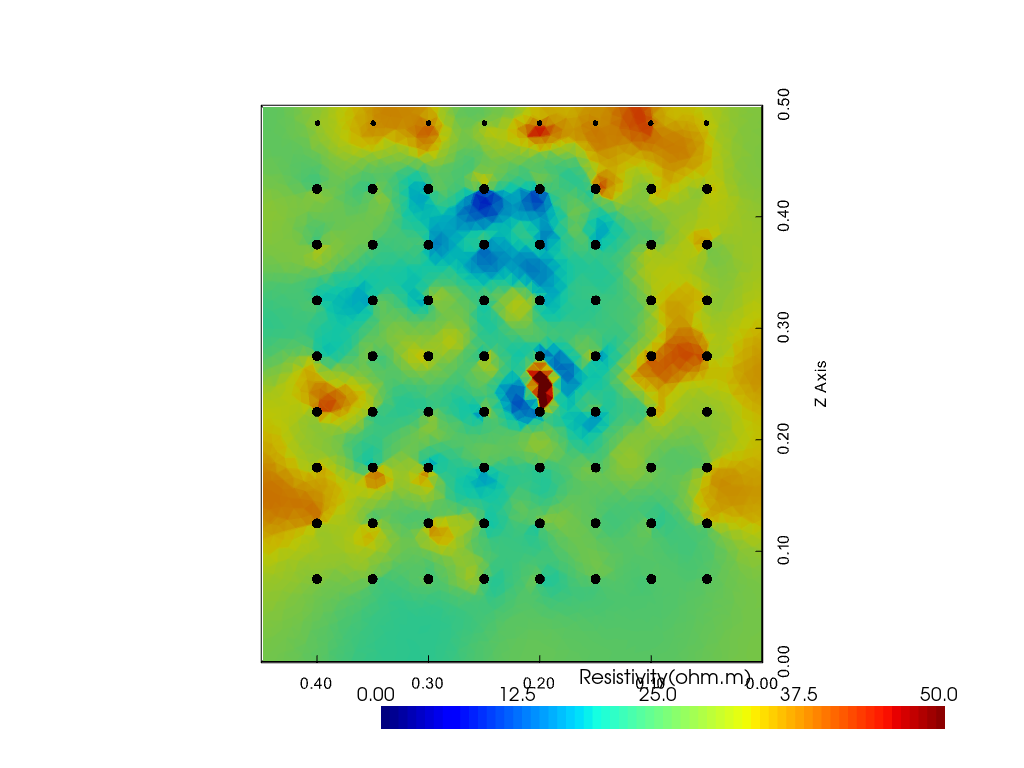

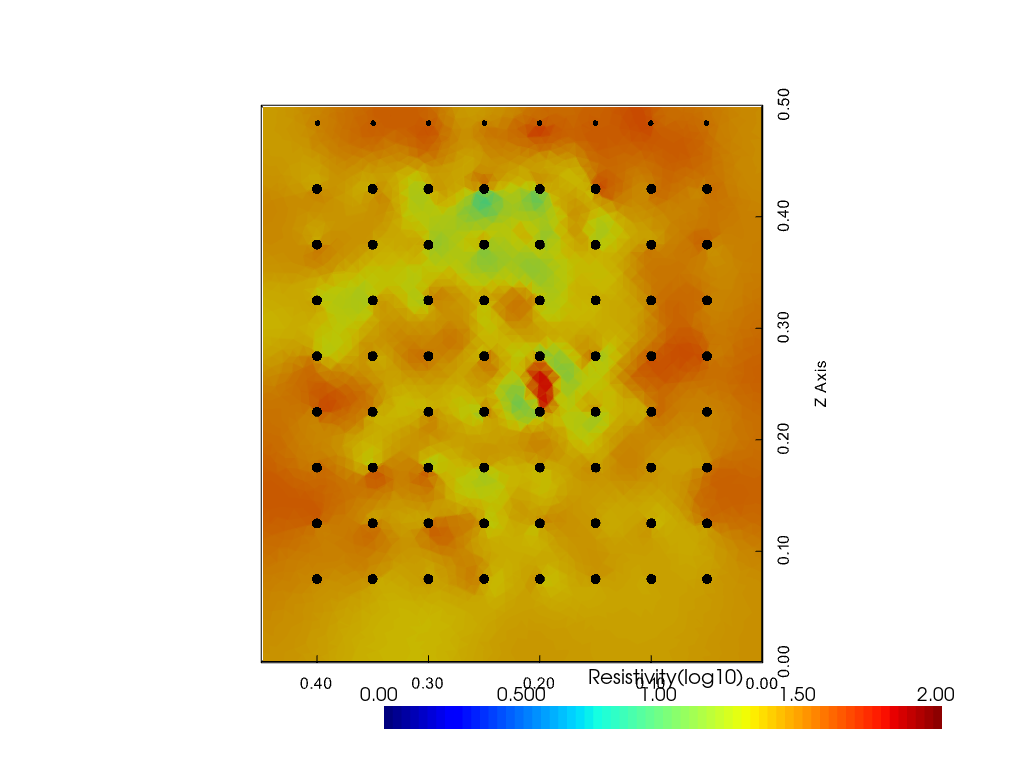

In [2]:
k_indiv = []
for i, f in enumerate(selected_files_ERT):
    k_indiv.append(proc.invert_ERT(imaging_path,
                                   filename=f,
                                   recip=5)
                   )
    proc.plot_ERT(k_indiv[i], vmin=0, vmax=50,
                  attr="Resistivity(ohm.m)",
                  index=0)
proc.plot_ERT(k_indiv[0], vmin=0, vmax=2,
              attr="Resistivity(log10)",
              index=0)

# Invert before/after irrigation

In [ ]:
idt_irr = [[3, 4]]

for itdIrr in idt_irr:
    selected_files_irr = [filenames_ERT[index] for index in itdIrr]
     k_TL = proc.invert_ERT_TL(
         imaging_path,
        files=selected_files_irr,
         regType=1,
        recip=5
     )

#     proc.plot_ERT(k_TL, vmin=0, vmax=3, attr="Resistivity(log10)", index=0)
#     proc.plot_ERT(k_TL, vmin=0, vmax=50, attr="Resistivity(ohm.m)", index=0)
#     proc.plot_ERT(k_TL, vmin=0, vmax=50, attr="Resistivity(ohm.m)", index=1)
#     proc.plot_ERT(k_TL, vmin=-50, vmax=50, attr="difference(percent)", index=1)

## MALM processing

In [ ]:

k_MALM = []
for i, f in enumerate(selected_files_MALM):
    outMALM = proc.prepare_MALM(imaging_path,
                                f,
                                k_indiv[i],
                                )
    k_MALM.append(outMALM[0])
nodes = outMALM[3]
imin = outMALM[1]

In [ ]:

m0 = []
for i, f in enumerate(selected_files_MALM):
    m0.append(proc.m0_MALM(imaging_path + 'inversionMALM/' + f,
                           method_m0='F1')
              )

    # pl = proc.plot_ERT(k_indiv[0], vmin=0, vmax=3,
    #                    attr="Resistivity(log10)",
    #                    index=0, show=False)

    proc.plot_m0_MALM(k_MALM[i], nodes, imin, m0[i])

In [ ]:

sol = []
for i, f in enumerate(selected_files_MALM):
    sol.append(proc.invert_MALM(imaging_path + 'inversionMALM/' + f,
                                wr=1)
               )
    proc.plot_MALM(k_MALM[i], nodes, imin, sol[i])

In [ ]:

sol = []
for i, f in enumerate(filenames_MALM):
    sol.append(proc.invert_MALM(imaging_path + 'inversionMALM/' + f,
                                pareto=True)
                )
    proc.plot_MALM(k_MALM[i],nodes,imin,sol[i][0])


# # In[ ]:

# k_TL = proc.invert_ERT_TL(
#                             imaging_path,
#                             files=filenames_ERT,
#                             regType=1,
#                             recip=10
#                         )

# proc.plot_ERT(k_TL, vmin=0, vmax=3, attr="Resistivity(log10)", index=0)
# proc.plot_ERT(k_TL, vmin=0, vmax=50, attr="Resistivity(ohm.m)", index=0)
# proc.plot_ERT(k_TL, vmin=0, vmax=50, attr="Resistivity(ohm.m)", index=1)
# proc.plot_ERT(k_TL, vmin=-50, vmax=50, attr="difference(percent)", index=1)